In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install pyreadstat

In [3]:
import pyreadstat
file_path = 'C:/Users/Candela/Desktop/TP2MET/BASEDATOS_ARGENTINA_122_ .sav'

df_diputados, meta = pyreadstat.read_sav('C:/Users/Candela/Desktop/TP2MET/BASEDATOS_ARGENTINA_122_ .sav')

df_diputados = df_diputados.loc[~((df_diputados['ID101'] == 98) | (df_diputados['ID101'] == 99) | 
                                   (df_diputados['PRO102'] == 98) | (df_diputados['PRO112'] == 99))]

In [4]:
df_diputados.head (266)

,Encuestado,País,legis,partido,departa,tipoelec,comision01,comision02,comision03,comision04,...,pcontacto2,pcontacto3,resultado1,resultado107,causaneg1,resultado2,causaneg2,resultado3,causaneg3,peso
0,4.0,1.0,2022.0,20.0,12.0,2.0,7.0,16.0,31.0,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.040102
1,6.0,1.0,2022.0,7.0,2.0,2.0,2.0,3.0,15.0,25.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
2,10.0,1.0,2022.0,2.0,15.0,2.0,1.0,2.0,3.0,4.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.838407
3,11.0,1.0,2022.0,7.0,2.0,2.0,5.0,15.0,27.0,35.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
4,12.0,1.0,2022.0,29.0,9.0,2.0,37.0,38.0,NaN,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.096378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,252.0,1.0,2022.0,20.0,2.0,2.0,18.0,19.0,NaN,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.040102
107,256.0,1.0,2022.0,7.0,2.0,2.0,26.0,29.0,36.0,43.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
108,257.0,1.0,2022.0,2.0,6.0,2.0,1.0,6.0,7.0,33.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.838407
109,258.0,1.0,2022.0,7.0,2.0,2.0,3.0,4.0,18.0,33.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927


In [5]:
pd.set_option('display.max_columns', None)
print(df_diputados)

     Encuestado  País   legis  partido  departa  tipoelec  comision01  \
0           4.0   1.0  2022.0     20.0     12.0       2.0         7.0   
1           6.0   1.0  2022.0      7.0      2.0       2.0         2.0   
2          10.0   1.0  2022.0      2.0     15.0       2.0         1.0   
3          11.0   1.0  2022.0      7.0      2.0       2.0         5.0   
4          12.0   1.0  2022.0     29.0      9.0       2.0        37.0   
..          ...   ...     ...      ...      ...       ...         ...   
106       252.0   1.0  2022.0     20.0      2.0       2.0        18.0   
107       256.0   1.0  2022.0      7.0      2.0       2.0        26.0   
108       257.0   1.0  2022.0      2.0      6.0       2.0         1.0   
109       258.0   1.0  2022.0      7.0      2.0       2.0         3.0   
110       259.0   1.0  2022.0     20.0     12.0       2.0         4.0   

     comision02  comision03  comision04  comision05  comision06  comision07  \
0          16.0        31.0         NaN     

In [6]:
df_diputados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 110
Columns: 266 entries, Encuestado to peso
dtypes: float64(261), object(5)
memory usage: 229.5+ KB


In [7]:
df_diputados.describe()

,Encuestado,País,legis,partido,departa,tipoelec,comision01,comision02,comision03,comision04,comision05,comision06,comision07,comision08,comision09,DEM1,PRO101,PRO102,PRO103,PRO104,PRO105,PRO106,PRO107,PRO108,PRO109,PRO110,PRO111,PRO112,PRO113,PRO114,DEM5,DEM6,INST101,INST102,INST103,INST104,INST105,INST106,INST107,INST108,INST109,INST110,INST111,INST112,INST113,INST114,INST115,ELE1,ELE201,IDP101,IDP102,IDP103,IDP104,IDP105,IDLN101,IDLN102,IDLN103,IDLN104,IDLN105,IDLN106,PP101,PP102,PP103,PP104,PP105,PP106,PP107,PP1a01,PP1a02,DIS1,DIS2,DIS3,REP1,REP2,CAMP401,CAMP402,CAMP403,CAMP404,CAND101,MED101,MED102,MED103,MED104,CLIEN2a01,CLIEN2a02,CLIEN2a03,CLIEN2a04,CLIEN2a05,CLIEN4,ACT101,ACT102,ACT103,ACT104,ACT105,VINC101,VINC102,VINC103,VINC104,VINC105,VINC106,VINC107,PJ101,FFAA101,EM101,INM101,INM102,INM103,INM104,INM105,INM106,GEN101,GEN102,GEN103,GEN104,GEN105,GEN201,GEN202,GEN203,GEN204,GEN401,GEN402,GEN403,GEN404,GEN405,CO201,CO202,CO203,CO204,CO205,CO206,CO207,CO208,CO209,CO210,CO211,CO212,CO213,CO3,ROES101,ROES102,ROES103,ROES104,ROES105,PRO2,ROES1A01,ROES1A02,ROES1A03,ROES1A04,BID401,BID501,BID502,CLIMA201,TR101,TR102,TR2,MPOL101,MPOL201,MPOL102,MPOL202,MPOL103,MPOL203,TR3,TR3a101,TR3a102,TR3a201,TR3a202,TR3a301,TR3a302,POL1,TR501,TR502,TR503,TR5a101,TR5a102,TR5a103,TR5a201,TR5a202,TR5a203,TR5a0301,TR5a0302,TR5a0303,EXPP1,EXPP1a,EXPP1b,AGL1,REP301,REP302,REP401,REP402,REP601,REP602,REP603,REP5,LEG3,SOCP1,SOCP2,SOCP2a01,SOCP2a02,SOCP2a03,SOCP2b01,SOCP2b02,SOCP2b03,SOCP2c01,SOCP2c02,SOCP2c03,SOCD1,SOCD2,SOCD3,SOCD3a,CONF101,BID1,BID301,BID201,BID202,VAL101,VAL102,VAL103,VAL104,VAL105,ID101,ID201,RE1,RE1a,RE1b,SOCD4,SOCD5,SOCD6,SOCD10,SOCD10a,SOCD10b,SOCD7,SOCD8,RED101,RED102,RED103,RED104,SOCD9,SOCD9a,ING1,ING3,V1,V201,V3,Duración,entrev,hora1,v2,v4,contacto1,contacto2,contacto3,pcontacto1,pcontacto2,pcontacto3,resultado1,causaneg1,resultado2,causaneg2,resultado3,causaneg3,peso
count,110.000000,110.0,110.0,110.000000,110.000000,110.0,110.000000,110.000000,103.000000,89.000000,68.000000,30.000000,15.000000,5.000000,2.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,21.000000,21.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,30.000000,27.000000,8.000000,8.000000,110.000000,40.000000,40.000000,14.000000,14.000000,6.000000,6.000000,110.000000,110.000000,110.000000,110.000000,49.000000,10.000000,1.0,72.000000,31.000000,4.00,78.000000,26.000000,9.000000,110.000000,102.000000,4.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,11

In [8]:
print(df_diputados[["POL1","ACT104"]])

     POL1  ACT104
0     1.0     3.0
1     2.0     2.0
2     2.0     1.0
3     2.0     1.0
4     2.0     1.0
..    ...     ...
106   1.0     1.0
107   2.0     1.0
108   2.0     1.0
109   2.0     1.0
110   1.0     1.0

[110 rows x 2 columns]


In [9]:
valores_POL1 = df_diputados ['POL1'].unique() 
valores_ACT104 = df_diputados ['ACT104'].unique()

print("Valores únicos en POL1:", valores_POL1) 
print("Valores únicos en ACT104:", valores_ACT104)

Valores únicos en POL1: [1. 2. 9.]
Valores únicos en ACT104: [3. 2. 1. 8. 4. 7. 5. 6.]


In [10]:
#¿se considera Ud. del gobierno o la oposición?
x = df_diputados["POL1"]

print(x.head())

0    1.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: POL1, dtype: float64


In [11]:
#En una escala de 1 a 10 donde 1 significa totalmente en desacuerdo” y 10 “Totalmente de acuerdo”. Cuanto de acuerdo esta en que a veces, es necesario limitar los derechos de la oposición cuando su ejercicio impide la implementación de políticas beneficiosas para el país
y = df_diputados["ACT104"]

print(y.head())

0    3.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: ACT104, dtype: float64


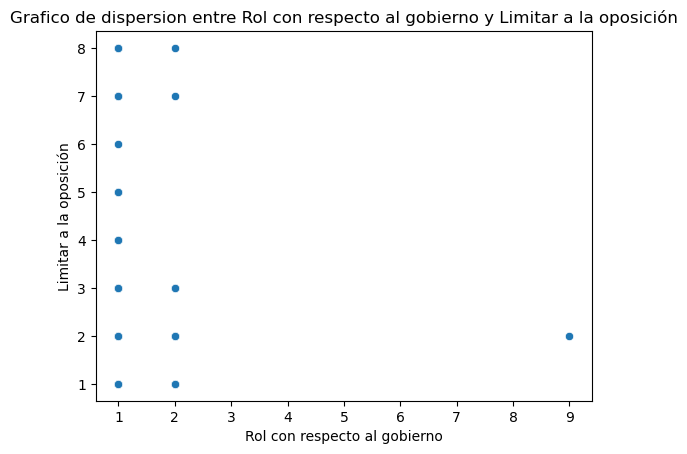

In [12]:
sns.scatterplot(x='POL1', y='ACT104', data=df_diputados)

plt.title('Grafico de dispersion entre Rol con respecto al gobierno y Limitar a la oposición')
plt.xlabel('Rol con respecto al gobierno')
plt.ylabel('Limitar a la oposición')
plt.show()

In [13]:
correlacion_pearson = df_diputados["POL1"].corr(df_diputados["ACT104"])
print("La correlación de Pearson entre Rol con respecto al gobierno y Limitar a la oposicion es:", correlacion_pearson)

La correlación de Pearson entre Rol con respecto al gobierno y Limitar a la oposicion es: -0.18179982861087468


In [14]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

r_squared = model.rsquared
print("El coeficiente de determinación (R²) es:", r_squared)

El coeficiente de determinación (R²) es: 0.03305117768294341


In [15]:
covarianza = df_diputados[['POL1', 'ACT104']].cov()

print("La matriz de covarianza es:")
print(covarianza)

La matriz de covarianza es:
            POL1    ACT104
POL1    0.751960 -0.293578
ACT104 -0.293578  3.467890


In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ACT104   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.692
Date:                Mon, 28 Oct 2024   Prob (F-statistic):             0.0573
Time:                        13:44:38   Log-Likelihood:                -222.13
No. Observations:                 110   AIC:                             448.3
Df Residuals:                     108   BIC:                             453.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6318      0.373      7.062      0.0

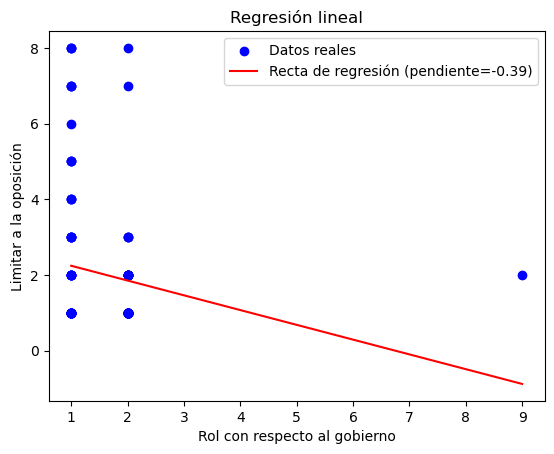

In [17]:
plt.scatter(df_diputados["POL1"], df_diputados["ACT104"], label='Datos reales', color='blue')

intercepto, pendiente = model.params
x_vals = np.linspace(df_diputados["POL1"].min(), df_diputados["POL1"].max(), 100)
y_vals = intercepto + pendiente * x_vals

plt.plot(x_vals, y_vals, color='red', label=f'Recta de regresión (pendiente={pendiente:.2f})')

plt.xlabel("Rol con respecto al gobierno")
plt.ylabel("Limitar a la oposición")
plt.title('Regresión lineal')
plt.legend()

plt.show()

In [18]:
print(f'Intercepto : {intercepto:.2f}')
print(f'Pendiente : {pendiente:.2f}')

Intercepto : 2.63
Pendiente : -0.39


In [19]:
#CORRELACION:
#La correlacion entre "Rol con respecto al gobierno" y "Limitar a la oposicion"  es debil siendo del -0.18 aproximadamente.
#En el grafico de dispersion se puede observar que sin importar si estaban a favor del gobierno, si eran oposicion o no contestaban, hay tendencia a mostrar desacuerdo con las limitaciones a la oposicion.

In [20]:
#REGRESION:
#El resultado de R2 es de 0.033 
# siendo el "ROl con respecto al gobierno" la variable X (independiente) y "Limitar a la oposicion" la variable y (dependiente), podemos decir que hay una baja determinacion de la variable x sobre la variable y. En otras palabras, aproximadamente el 3.31% de la variabilidad en la variable dependiente (en este caso, "Limitar a la oposición") se puede explicar por la variable independiente ("Rol con respecto al gobierno").

In [21]:
#COVARIANZA:
#Se puede observar que entre las variables hay uan relacion negativa, ya que al aumentar la variable x, la variable y disminuye, (de igual manera no se explica una correlacio o causalidad entre estas)
#En el grafico la variable "limitar a la oposicion" (y), muestra mas dispersion aunque de manera leve, si la comparamos con la varibale "Rol respecto al gobierno" (x). En parte tambien por las posibilidades de respuestas en el cuestionario realizado a la hora de preguntar por la variable "limitar a la oposicion".

In [22]:
#En cuanto a la significatividad del modelo, un valor de 0.0573 sugiere que la relación entre las variables podría ser marginalmente significativa. Esto indica que, aunque el modelo presenta un bajo poder explicativo, aún puede ser considerado útil en cierta medida.
# El nivel de confianza del modelo es del 95%, lo que sugiere que podemos confiar en la precisión de los resultados.

